# The Singular Value Decomposition (SVD) (Session 2) 

You've probably experienced this too: you want to send an image in excellent quality via a messaging app. However, the quality of the image deteriorates significantly when you send it. What is the reason for this and what does that have to do with the SVD? 

In this session, we will explore this question and perform another application of SVD. We will use the SVD for image compression. To that end, we will look at how to import images into Python and display them in colour or gray. We will also look at what singular values have to do with image compression quality. You can read some information about image compression using SVD at the following website: https://timbaumann.info/svd-image-compression-demo/

For simplicity, we will first perform image compression of a grayscale image. The code for the truncation function will remain the same as in the first session. We do not need to implement it again.

In [5]:
import numpy             as     np
import matplotlib.pyplot as     plt
import math
import matplotlib.image  as     mpimg
from   numpy             import linalg

def truncate(U, S, V, k): # compute the truncated svd, see first session
    U_trunc = U[:, :k]
    S_trunc = S[:k]
    V_trunc = V[:k, :]
    return U_trunc, S_trunc, V_trunc

We will use a grayscale image of a true mathematical popstar. You can download the image in Moodle. 

To work with the image, we first need to load the image and put it into a format we can work with. This means that we need to know exactly what format the image will be in after loading, so that we can work with it properly. As a first step, you should look at the *imread* function from *matplotlib.pyplot* (see https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html). We will use the *imread* function to read in the image in *Python*. For plotting the function *imshow* could be helpful (see https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html. The *shape()* function of *numpy* can help to understand the format of the loaded image (see https://numpy.org/devdocs/reference/generated/numpy.shape.html).


In [6]:
# Task:
# 1. Read in the picture of Gauß in Python. 
# 2. Analyze how the image is stored in Python. What do you notice? 
# 3. Plot the picture of Gauß. You may need the cmap option to display the image in grayscale. 


We now have an image in grayscale, that is, we have a matrix $A$ in which the gray value of each pixel is stored. The entries $a_{i,j}$ of $A$ can be either an integer value in the range $[0,255]$ or a double value in the range $[0,1]$. The next step is compression using SVD. <br>
To prepare, try to display the singular values of matrix $A$ and consider what the decay of the singular values means for the quality of our compressed image. For this task, recall that 
$$
\Vert A - A_{k} \Vert_{F}^{2} = \sum_{i=k+1}^{n} \sigma_{i}^{2}
$$
holds.

In [7]:
# Task:
# 1. Do the SVD of the data matrix of the grayscale image. 
# 2. Plot the singular values. How many SV do you think we can cut off and still have a "good" picture?


What do you notice in this plot? Think a little about the shape of the curve. We will now perform image compression and image reconstruction for various numbers of singular values used. Complete the script below to do this. 

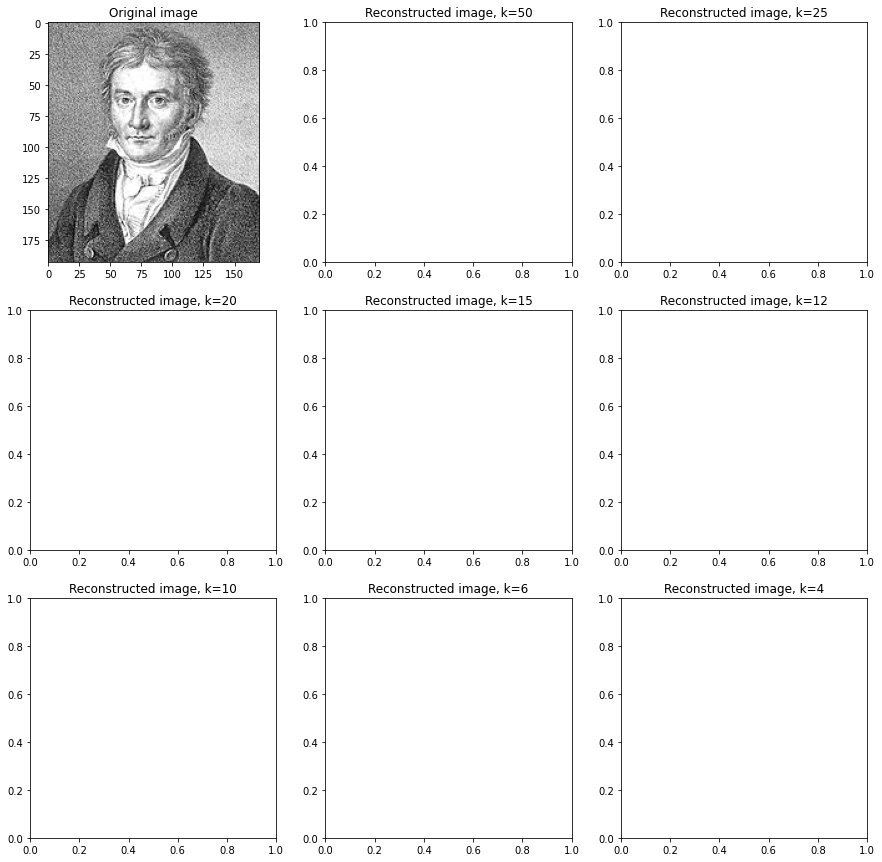

In [9]:
# number of singular values kept
k = [50,25,20,15,12,10,6,4]

row_count    = math.ceil(len(k)/3)
column_count = math.ceil(len(k)/row_count)

fig,axs = plt.subplots(row_count, column_count, figsize=(15,15))

# start plotting and truncating
cnt = 0
for i in range(row_count):
    for j in range(column_count):
        # plot the original image with different title
        if i==0 and j==0:
            axs[i,j].set_title("Original image")
            axs[i,j].imshow(plt.imread("gauss.jpg"), cmap='gray')

        # plot the remaining
        else:
            axs[i,j].set_title(f"Reconstructed image, k={k[cnt]}")
            cnt += 1
            # Task:
            # 1. Calculate the SVD of the data matrix of the grayscale image. 
            # 2. Keep k singular values
            # 2. Reconstruct the grayscale picture of Gauß with different numbers of singular values used.

Let's think about the quality of the pictures we created. One may ask the question: For what values of k can an AI still recognize JCF Gauss on this picture?  <br>
At this point we will not implement AI for image recognition. We will use the website https://imagerecognize.com/celebrities/ where we can upload pictures from celebrities and it will tell us which celebrity it is and how sure it is. Upload the results of the above script to the website. What do you observe?

In the next step we take a closer look at colour pictures and how they are encoded. As we might know from biology class at school, the eye consists of two different types of photoreceptors, the so called rods and cones. They are responsible for our ability to see different colours. Further, there are three types of cones. These cone types react differently to the incident light radiation in the spectral range from blue (about 400 to 500 nm), green (about 500 to 600 nm) and red (about 600 to 700 nm). The color impression is created by a mixture of the three partial sensations. 

**Task:** With this background knowledge, how would you expect a digital image of 1216x1824 pixels to be encoded?

**Answer:** 

Let's check that. In order to do so, we need to read in a colour image, print the dimensions and have a look at the minimum and maximum values in the data matrix. For this task we can use the numpy functions *np.amax* and *np.amin*. You can find it in the documentation https://numpy.org/doc/stable/reference/generated/numpy.amax.html#numpy.amax as well as https://numpy.org/doc/stable/reference/generated/numpy.amin.html#numpy.amin. Moreover, the python function *str()* could be helpful for plotting. It takes an object as input and returns a string representation of it. See e.g. https://docs.python.org/3/library/stdtypes.html#str for more information.

In [10]:
# Task
# 1. Read in the image "himbeere.jpg"


# 2. Print the dimension/shape of the object rgb_img


# 3. Print the maximum and minimum value


# 4. Plot the image


Now we know with which data we deal, so that we are able to work with it. Let's try to print the red, green and blue part of the picture. As we have just seen, the data of the image is not only a matrix $A \in \mathbf{R}^{m \times n}$ but a tensor $A \in \mathbf{R}^{m \times n \times c}$, where the last dimension $c$ stands for the three colour channels red, green and blue. The way in which we deal with such tensors in *python* do not differ from the way we deal with matrices. We know that the last dimension refers to the colour channels and therefore we know what, for instance $A[:,:,0]$ means.

In [11]:
# Task
# 1. Pick out the matrices for the red, green and blue channel

# 2. Plot the images (you may need the option cmap of axes.imshow 
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html)


This is really what we have expected. The colour image is just the combination of the three colour channels red, green and blue. Before we try to compress the image let us calculate how large the image is in terms of storage requirements. Let's say for each pixel we store an integer value for a single colour. A natural number in the range $[0,255]$ can be stored as a 8 bit integer. In many computer architectures this is defined as 1 byte. Hence we need to have $\text{Storage}(\text{himbeere}) = 1 \cdot 3 \cdot 1216 \cdot 1824 \text{ byte} = 6,653,952 \text{ byte} \approx 6.3 \text{ Mbyte}$. In order to compress the colour image, we can proceed like in the case of a gray scale image for each channel. 

In [13]:
# Task
# 1. Pick out the matrices for the red, green and blue channel


# 2. Perform a typecast to double and scale the colour channels to [0,1]


# 3. Calculate the SVD decomposition


for k in [100, 25, 10]:

    # 4. Truncate


    # 5. Reconstruct


    # 6. Build the rgb-matrix


    # 7. Plot the images (reconstructed, red, green, blue)


**Task:** Why do we get the message "Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).", which comes from the *axes.imshow* function? To answer that, recall what the best-rank-k approximation means for the entries of the matrix $A_{k}$.

**Answer:** 

**Task:** We have successfully compressed the image and what we have already noticed in the case of a gray scale image is, that the resolution decreased. For $k=100$ the image still looks good enough to recognize the raspberries, but to store the image we still have a matrix of shape $(1216, 1824, 3)$. Where is the advantage in terms of memory requirements? 

**Answer:** 

We have truncated the same amount of singular values for each color. Is there another way to compress the image? Try to have a look at the singular values for each colour and think about truncating a different amount of singular values for each colour.

In [17]:
# Task
# 1. Plot the singular values for each channel


# 2. Plot the singular values in one figure, but only with a truncation until k=100



We can see that the decrease for the red channel is faster than for the other. Maybe we can cut off more singular values for the red channel than for the others and the approximation accuracy stays the same. Lets try this. To that end, truncate until $k=100$ for every channel and calculate the frobenius norm of $A - A_{k=100}$. Then truncate the red channel until $k=40$ and reconstruct the Matrix $A_{k \text{ mixed}}$ with the green and blue channel for $k=100$ and with the red for $k=40$. Also calculate the frobenius norm of $A - A_{k \text{ mixed}}$ and compare both. Hint: You can look into the documentation https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html.

In [16]:
# Task
# 1. Cut off until k=100 for each channel


# 2. Reconstruct A_(k=100)


# 3. Calculate and print out the frobenius norm


# 4. Cut off until k=100 for green and blue, but until k=40 for the red channel


# 5. Reconstruct A_(mixed k)


# 6. Calculate and print out the frobenius norm



What can we say about the error? Now as a last step plot again the compressed images and compare the resolution.

In [15]:
# Task
# 1. Print the original and the two compressed images



We can see, that at least for the eye there is no difference between the two compressed images. Also the error is quite the same, despite the fact that we have further compressed the image.